### Project 1, John Clark, W205 Section 9

In this project, I will peform an analysis to determine how to increase ridership at Lyft Bay Wheels. We begin this effort by making a number of SQL queries and performing some visualizations. 

### Iniitialize Libraries 

In [20]:
import pandas as pd


### SQL Queries

We start out with SQL queries asking three questions: 
* What is the size of this dataset? 
* What is the earliest start date and time and latest end data and time for a trip? 
* How many bikes are there: 
    
The following queries will answer thse questions

In [22]:
! bq query --use_legacy_sql=FALSE 'SELECT count(*) FROM `bigquery-public-data.san_francisco.bikeshare_trips`'

! bq query --use_legacy_sql=FALSE 'SELECT min(start_date), max(end_date), FROM `bigquery-public-data.san_francisco.bikeshare_trips`'

! bq query --use_legacy_sql=false 'select count(distinct(bike_number)) from `bigquery-public-data.san_francisco.bikeshare_trips`'


Waiting on bqjob_r59f98f92ef6d467b_00000179e7bf2e86_1 ... (0s) Current status: DONE   
+--------+
|  f0_   |
+--------+
| 983648 |
+--------+
Waiting on bqjob_reb13804f737e5f5_00000179e7bf362d_1 ... (0s) Current status: DONE   
+---------------------+---------------------+
|         f0_         |         f1_         |
+---------------------+---------------------+
| 2013-08-29 09:08:00 | 2016-08-31 23:48:00 |
+---------------------+---------------------+
Waiting on bqjob_r4dec8408492823d8_00000179e7bf3c02_1 ... (0s) Current status: DONE   
+-----+
| f0_ |
+-----+
| 700 |
+-----+


As we can see, the trips database has a total of 983,648 records in it. The earlist trip occurred on August 29th in 2013 and the latest trip occurred on August 31st of 2016.  Given total unique bike numbers, there appear to be 700 bikes. Let's consider an additional couple of SQL queries to answer the following question: 
* How many trips are in the morning vs. the afternoon? 

Let us assume the morning is defined between 6:00AM and 11:59AM and the afternoon is defined as 12:00pm and 4:59PM.

In [23]:
! bq query --use_legacy_sql=false 'SELECT count(*)from `bigquery-public-data.san_francisco.bikeshare_trips` where extract(hour from end_date AT TIME ZONE "UTC") between 6 AND 11'
! bq query --use_legacy_sql=false 'SELECT count(*) from `bigquery-public-data.san_francisco.bikeshare_trips` where extract(hour from end_date AT TIME ZONE "UTC") between 12 AND 16'


Waiting on bqjob_r2ff41df03b20782f_00000179e7bf79e9_1 ... (0s) Current status: DONE   
+--------+
|  f0_   |
+--------+
| 387728 |
+--------+
Waiting on bqjob_r34d40c1bc1292087_00000179e7bf7fcd_1 ... (0s) Current status: DONE   
+--------+
|  f0_   |
+--------+
| 250705 |
+--------+


Our query tells us that there are 387,728 trips in the morning and 250,705 trips in the afternoon. 

Let us seek answers to 5 additional questions that tell us more about our dataset: 
* Is there any revenue leakage due to bicycles being unavailable? 
* What is the list of stations? 
* What are the most popular trips? 
* How many trips occur during peak rush hour times of 7:00PM and 9:59PM and 4:00PM and 6:59PM? 
* How many trips make use of a subscription vs. non subscription? 
* What is the distribution of trips throughout the day using a historgram? 
* Is there any dirty data in this dataset that causes us a concern? 

First, we look at the availability of bikes compared to the total number of bikes. 

In [24]:
! bq query --use_legacy_sql=false 'select count(*) FROM `bigquery-public-data.san_francisco.bikeshare_status` where bikes_available = 0'
! bq query --use_legacy_sql=false 'select count(*) FROM `bigquery-public-data.san_francisco.bikeshare_status`'


Waiting on bqjob_r29a1102294cea88d_00000179e7bff41e_1 ... (0s) Current status: DONE   
+--------+
|  f0_   |
+--------+
| 850830 |
+--------+
Waiting on bqjob_r3097225181f84444_00000179e7bffc2e_1 ... (0s) Current status: DONE   
+-----------+
|    f0_    |
+-----------+
| 107501619 |
+-----------+


We can see that 850,830 times, there have been zero bikes available at a station. However, when this is compared to the total number of status updates of 10,750,619, the number does not appear so large. In fact, there are no bikes avilable .0079% of the time or less than 1 percent. 

Let's look next at the list of stations so we have an idea geographically as to where they are all at. 

In [25]:
! bq query --use_legacy_sql=FALSE 'SELECT distinct station_id, name, landmark FROM `bigquery-public-data.san_francisco.bikeshare_stations` ORDER BY landmark'

Waiting on bqjob_r5001f16f17247d2c_00000179e7c02ee1_1 ... (0s) Current status: DONE   
+------------+-----------------------------------------------+---------------+
| station_id |                     name                      |   landmark    |
+------------+-----------------------------------------------+---------------+
|         32 | Castro Street and El Camino Real              | Mountain View |
|         27 | Mountain View City Hall                       | Mountain View |
|         33 | Charleston Park/ North Bayshore Area          | Mountain View |
|         30 | Middlefield Light Rail Station                | Mountain View |
|         31 | San Antonio Shopping Center                   | Mountain View |
|         29 | San Antonio Caltrain Station                  | Mountain View |
|         28 | Mountain View Caltrain Station                | Mountain View |
|         37 | Cowper at University                          | Palo Alto     |
|         35 | University and Emerson       

A majority of the stations are in San Francisco and San Jose but we also see stations in Mountain View, Redwood City and Palo Alto. Noteably, there are no stations in the East Bay. 

Let's now consider the most popular trips. 

In [ ]:
! bq query --use_legacy_sql=FALSE 'SELECT end_station_name, start_station_name, landmark, count(*) as trip_freq FROM `bigquery-public-data.san_francisco.bikeshare_trips` a INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` b ON a.end_station_id BETWEEN b.station_id AND b.station_id GROUP BY landmark, end_station_name, start_station_name ORDER BY trip_freq DESC'


We can see that 96 of the 100 most popular trips terminate in San Francisco. Two terminate in Mountain View and two terminate in San Jose. 

Now let us look at how many trips occur at peak rush hour times of 7:00PM and 9:59PM and 4:00PM and 6:59PM. 

In [27]:
! bq query --use_legacy_sql=false 'SELECT count(*) from `bigquery-public-data.san_francisco.bikeshare_trips` where extract(hour from end_date AT TIME ZONE "UTC") between 7 AND 9'
! bq query --use_legacy_sql=false 'SELECT count(*) from `bigquery-public-data.san_francisco.bikeshare_trips` where extract(hour from start_date AT TIME ZONE "UTC") between 16 AND 18'      


Waiting on bqjob_r25499a4710140176_00000179e7c11ec3_1 ... (0s) Current status: DONE   
+--------+
|  f0_   |
+--------+
| 288598 |
+--------+
Waiting on bqjob_r744f080c45a31efd_00000179e7c124b5_1 ... (0s) Current status: DONE   
+--------+
|  f0_   |
+--------+
| 299626 |
+--------+


There are 288,598 trips at the peak of morning rush hour and 299,626 during the peak of afternoon/early evening rush hour. These two numbers total to 60% of all the trips at Lyft Bay Wheels, therefore, targeting commuters appears to a good strategy of increasing sales volumes. 

Let us now look at the breakdown of subscribers based on their subscription type. 

In [30]:
! bq query --use_legacy_sql=false 'SELECT subscriber_type, count(subscriber_type) from `bigquery-public-data.san_francisco.bikeshare_trips` GROUP by subscriber_type'

Waiting on bqjob_r58e68c1cb16df251_00000179e7c4ef2d_1 ... (0s) Current status: DONE   
+-----------------+--------+
| subscriber_type |  f0_   |
+-----------------+--------+
| Customer        | 136809 |
| Subscriber      | 846839 |
+-----------------+--------+


Based on this query, we can determine that 846,839 of the rides are by subscribers and only 136,809 are one time customers or those with a three day pass. Unfortunately this information is not very granular to inform us as to which types of promotions have been in place in the past, not how effective those particular promotions have been. 

We will follow this by creating a CSV file of the bicycle trips, which includes joined data from the stations file so it can be reported on. 


In [33]:
! bq query --max_rows=1000000 --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `bigquery-public-data.san_francisco.bikeshare_trips` a INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` b ON a.end_station_id BETWEEN b.station_id AND b.station_id' > result.csv

Waiting on bqjob_r5df9417bdbecdcff_00000179e7cb6782_1 ... (0s) Current status: DONE   


### Read the data from the file into Pandas and create a simple data visualization

In [34]:
pop_trips = pd.read_csv('result.csv')

In [35]:
pop_trips

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,subscriber_type,station_id,name,latitude,longitude,dockcount,landmark,installation_date
0,512184,505,2014-10-23 14:40:00,2nd at Folsom,62,2014-10-23 14:49:00,Market at 4th,76,470,94107,Subscriber,76,Market at 4th,37.786305,-122.404966,19,San Francisco,2013-08-25
1,64280,509,2013-10-18 19:17:00,2nd at Folsom,62,2013-10-18 19:25:00,Market at 4th,76,266,94117,Subscriber,76,Market at 4th,37.786305,-122.404966,19,San Francisco,2013-08-25
2,1179810,265,2016-04-27 21:33:00,2nd at Folsom,62,2016-04-27 21:38:00,Market at 4th,76,456,94105,Subscriber,76,Market at 4th,37.786305,-122.404966,19,San Francisco,2013-08-25
3,352117,396,2014-07-06 15:51:00,2nd at Folsom,62,2014-07-06 15:58:00,Market at 4th,76,322,94107,Subscriber,76,Market at 4th,37.786305,-122.404966,19,San Francisco,2013-08-25
4,726689,576,2015-04-15 14:07:00,2nd at Folsom,62,2015-04-15 14:17:00,Market at 4th,76,483,94901,Subscriber,76,Market at 4th,37.786305,-122.404966,19,San Francisco,2013-08-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983643,383411,317,2014-07-28 17:04:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2014-07-28 17:10:00,San Francisco Caltrain 2 (330 Townsend),69,276,94087,Subscriber,69,San Francisco Caltrain 2 (330 Townsend),37.776600,-122.395470,23,San Francisco,2013-08-23
983644,496204,590,2014-10-13 16:47:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2014-10-13 16:57:00,San Francisco Caltrain 2 (330 Townsend),69,366,94104,Subscriber,69,San Francisco Caltrain 2 (330 Townsend),37.776600,-122.395470,23,San Francisco,2013-08-23
983645,1117325,301,2016-03-07 17:11:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2016-03-07 17:16:00,San Francisco Caltrain 2 (330 Townsend),69,318,94062,Subscriber,69,San Francisco Caltrain 2 (330 Townsend),37.776600,-122.395470,23,San Francisco,2013-08-23
983646,376938,650,2014-07-23 17:22:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2014-07-23 17:33:00,San Francisco Caltrain 2 (330 Townsend),69,275,94107,Subscriber,69,San Francisco Caltrain 2 (330 Townsend),37.776600,-122.395470,23,San Francisco,2013-08-23


In [ ]:
pop_trips.end_date.hist()

<AxesSubplot:>

### We can also use the magic commands to run  BigQuery SQL


#### This runs the query above and prints to the notebook output

In [42]:
%%bigquery

SELECT start_station_name, end_station_name, count(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY start_station_name, end_station_name 
ORDER BY trip_freq DESC LIMIT 5

,start_station_name,end_station_name,trip_freq
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,Embarcadero at Sansome,Steuart at Market,6874


#### This next magic command saves it into a Pandas data frame

In [43]:
%%bigquery my_panda_data_frame

SELECT start_station_name, end_station_name, count(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY start_station_name, end_station_name 
ORDER BY trip_freq DESC LIMIT 5

In [44]:
my_panda_data_frame

,start_station_name,end_station_name,trip_freq
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,Embarcadero at Sansome,Steuart at Market,6874


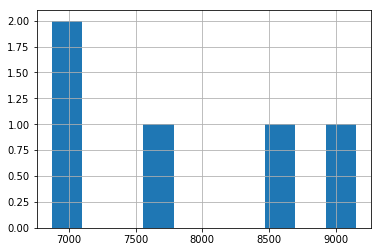

In [46]:
my_panda_data_frame.trip_freq.hist()